<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">22.418 · Aprenentatge automàtic</p>
<p style="margin: 0; text-align:right;">Grau en Ciència de Dades Aplicada</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudis de Informàtica, Multimèdia i Telecomunicació</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>


# Support Vector Regression

In this notebook we will learn how to use SVM for regression tasks using the <a href="https://scikit-learn.org/stable/" target="_blank">scikit-learn</a> library. 

**Note**: If you are running this in [a colab notebook](https://colab.research.google.com/github/skorch-dev/skorch/blob/master/notebooks/MNIST.ipynb), you should install the dependencies by running the following cell:

In [1]:
# ! pip install scikit-learn matplotlib numpy

Again, we are going to use a synthetic dataset generated from sinus curve with some added noise.

In [2]:
import numpy as np
np.random.seed(0)

# X is our input data for training
X_train = np.sort(5 * np.random.rand(40, 1), axis=0)
# y is the target variable
y_train = np.sin(X_train).ravel()
# Add noise to targets
y_train[::5] += 1 * (0.5 - np.random.rand(8))


There are different implementations of **Support Vector Regression** in <code>sklearn</code>, we are going to use the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html#sklearn.svm.SVR"><code>sklearn.svm.SVR</code></a> class which allows us to use different kernels with the <code>kernel</code> parameter of its constructor. We can also set the soft margin parameter $C$ in the model using the <code></code> parameter. 

The following code creates a SVR regressor with a linear kernel and fits it to our training data with the <code>fit()</code> method.



In [3]:
# Fit regression model
from sklearn.svm import SVR

svr = SVR(kernel='linear', C=100)
svr.fit(X_train, y_train)

,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,tol,0.001
,C,100
,epsilon,0.1
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


Let's visualize the output regression for the learned model:

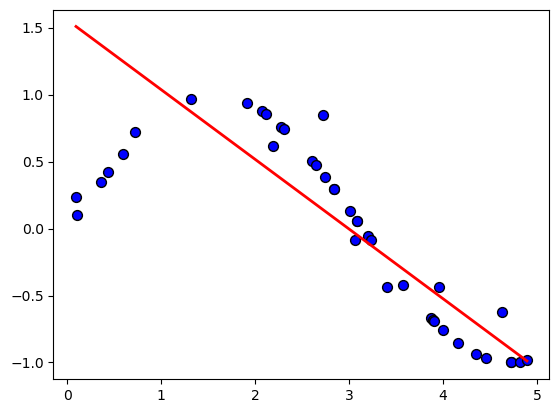

In [4]:
import matplotlib.pyplot as plt

# Plot the regression line
plt.plot(X_train, svr.predict(X_train), color='r', lw=2)

# Plot the training data points
plt.scatter(X_train, y_train, facecolor="b", edgecolor="k", s=50)


Now we create three instances of the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html#sklearn.svm.SVR"><code>sklearn.svm.SVR</code></a> class with different <code>kernel</code> and fit them to our training data with the <code>fit()</code> method. 

In [5]:
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_lin = SVR(kernel='linear', C=100, gamma='auto')
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1, coef0=1)

Let's visualize the output regression for different models. In this case we will also differentiate between the training samples that are used as **support vectors** for the model and those that are ignored (using different colors in the plot).

---



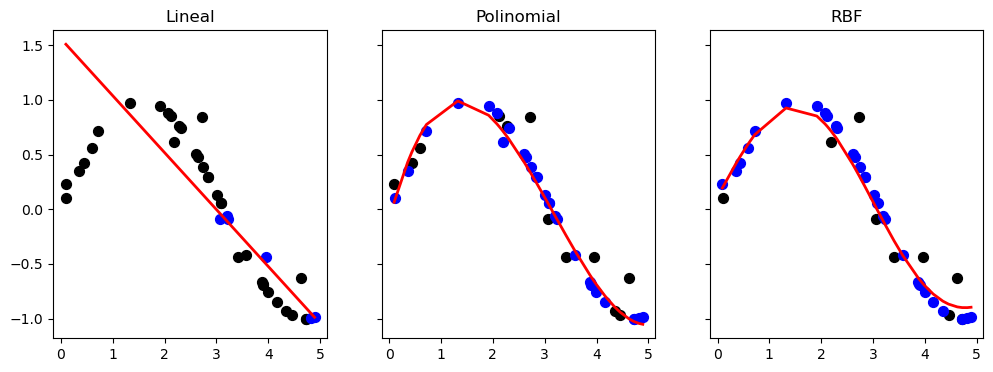

In [6]:
svrs = [svr_lin, svr_poly, svr_rbf]
kernel_label = ['Lineal', 'Polinomial', 'RBF']
model_color = ['r', 'r', 'r']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4), sharey=True)
for ix, svr in enumerate(svrs):
    axes[ix].plot(X_train, svr.fit(X_train, y_train).predict(X_train), color=model_color[ix], lw=2,
                  label='{} model'.format(kernel_label[ix]))
    # Plot the support vectors in black
    axes[ix].scatter(X_train[svr.support_], y_train[svr.support_], facecolor="k",
                     edgecolor="k", s=50,
                     label='{} support vectors'.format(kernel_label[ix]))
    # Plot the rest of training points in blue
    axes[ix].scatter(X_train[np.setdiff1d(np.arange(len(X_train)), svr.support_)],
                     y_train[np.setdiff1d(np.arange(len(X_train)), svr.support_)],
                     facecolor="b", edgecolor="b", s=50,
                     label='other training data')
    axes[ix].set_title(kernel_label[ix])

### EXERCISE

Use <code>SVR</code> with different kernels in the boston house-price dataset and compare its performance with the <code>LinearRegression</code>, <code>KNeighborsRegressor</code> and <code>DecisionTreeRegressor</code> in both the univariate and multivariate cases.